<a href="https://colab.research.google.com/github/Gayatrimehta123/CodSoft/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
os.listdir()

['.config', '.ipynb_checkpoints', 'moviegenre1', 'sample_data']

In [5]:
files=os.listdir('moviegenre1')
print(files)

['test_data.txt', 'description.txt', 'test_data_solution.txt', 'train_data.txt']


1. Read or extract data

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("moviegenre1/description.txt")
data

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


2. splitting of data

In [7]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    data = [line.strip().split(' ::: ') for line in lines]
    return data



In [8]:
train_data=load_data('moviegenre1/train_data.txt')
train_df=pd.DataFrame(train_data,columns=['ID','Title','Genre','Description'])

test_data=load_data('moviegenre1/test_data.txt')
test_df=pd.DataFrame(test_data,columns=['ID','Title','Description'])

test_solution=load_data('moviegenre1/test_data_solution.txt')
test_solution_df=pd.DataFrame(test_solution,columns=['ID','Title','Genre','Description'])

In [9]:
print(test_data[0])


['1', "Edgar's Lunch (1998)", "L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."]


In [10]:
print("Train Data:")
train_df



Train Data:


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [11]:
print("Test Data:")
test_df

Test Data:


,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


In [12]:
print("Test Solution Data:")
test_solution_df

Test Solution Data:


,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."


Feature extraction : tf-ide

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=10000)

X_train_tfidf=vectorizer.fit_transform(train_df['Description'])
X_test_tfidf=vectorizer.transform(test_df['Description'])

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(54214, 10000)
(54200, 10000)


Encoding the target labels


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(train_df['Genre'])
print(label_encoder.classes_)

['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


Model Building - Logistic Regression


In [15]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf,y_train)

y_pred = lr_model.predict(X_test_tfidf)
predicted_genres = label_encoder.inverse_transform(y_pred)

test_df['Predicted_Genre'] = predicted_genres
test_df[['Title','Predicted_Genre']]

,Title,Predicted_Genre
0,Edgar's Lunch (1998),drama
1,La guerra de papá (1977),drama
2,Off the Beaten Track (2010),documentary
3,Meu Amigo Hindu (2015),drama
4,Er nu zhai (1955),drama
...,...,...
54195,"""Tales of Light & Dark"" (2013)",drama
54196,Der letzte Mohikaner (1965),drama
54197,Oliver Twink (2007),comedy
54198,Slipstream (1973),drama


In [16]:
test_df['Predicted_Genre'] = predicted_genres

merge_df = pd.merge(test_solution_df[['ID','Genre']],test_df[['ID','Predicted_Genre']], on='ID')
merge_df

,ID,Genre,Predicted_Genre
0,1,thriller,drama
1,2,comedy,drama
2,3,documentary,documentary
3,4,drama,drama
4,5,drama,drama
...,...,...,...
54195,54196,horror,drama
54196,54197,western,drama
54197,54198,adult,comedy
54198,54199,drama,drama


Model Evaluation - Logistic Regression

In [17]:
from sklearn.metrics import accuracy_score,classification_report

accuracy= accuracy_score(merge_df['Genre'],merge_df['Predicted_Genre'])
print(f"Accuracy: {accuracy:.4f}")

print("\nClassifictaion Report:")
print(classification_report(merge_df['Genre'],merge_df['Predicted_Genre']))

Accuracy: 0.5945

Classifictaion Report:
              precision    recall  f1-score   support

      action       0.51      0.30      0.37      1314
       adult       0.65      0.24      0.35       590
   adventure       0.67      0.16      0.25       775
   animation       0.61      0.04      0.08       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.60      0.57      7446
       crime       0.41      0.03      0.06       505
 documentary       0.68      0.87      0.76     13096
       drama       0.55      0.78      0.65     13612
      family       0.49      0.08      0.14       783
     fantasy       0.61      0.03      0.06       322
   game-show       0.90      0.49      0.64       193
     history       0.00      0.00      0.00       243
      horror       0.66      0.57      0.61      2204
       music       0.67      0.46      0.55       731
     musical       0.44      0.01      0.03       276
     mystery       0.33      0.00      0

Model Building - Navie Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)



MultinomialNB()

In [19]:
y_pred_nb=nb_model.predict(X_test_tfidf)
predicted_genres_nb=label_encoder.inverse_transform(y_pred_nb)
test_df['Predicted_Genre_NB']=predicted_genres_nb
merge_df_nb=pd.merge(test_solution_df,test_df[['ID','Predicted_Genre_NB']],on='ID')

Model Evaluation- Navie Bayes


In [20]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_nb=accuracy_score(merge_df_nb['Genre'],merge_df_nb['Predicted_Genre_NB'])
print(f"Accuracy: {accuracy_nb}")
print("\nClassification Report:")
print(classification_report(merge_df_nb['Genre'],merge_df_nb['Predicted_Genre_NB']))

Accuracy: 0.5092435424354244

Classification Report:
              precision    recall  f1-score   support

      action       0.56      0.03      0.06      1314
       adult       0.46      0.02      0.04       590
   adventure       0.77      0.04      0.08       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.40      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.56      0.89      0.69     13096
       drama       0.44      0.84      0.58     13612
      family       0.00      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       1.00      0.02      0.04       193
     history       0.00      0.00      0.00       243
      horror       0.77      0.23      0.35      2204
       music       0.89      0.02      0.05       731
     musical       0.00      0.00      0.00       276
     mystery       0.00     

In [22]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)


model building: SVM

In [23]:
y_pred_svm = svm_model.predict(X_test_tfidf)
predicted_genres_svm = label_encoder.inverse_transform(y_pred_svm)
test_df['Predicted_Genre_SVM'] = predicted_genres_svm
merge_df_svm = pd.merge(test_solution_df, test_df[['ID', 'Predicted_Genre_SVM']], on='ID')

Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_svm = accuracy_score(merge_df_svm['Genre'], merge_df_svm['Predicted_Genre_SVM'])
print(f"Accuracy: {accuracy_svm}")

print("SVM classification report:")
print(classification_report(merge_df_svm['Genre'], merge_df_svm['Predicted_Genre_SVM'],target_names=label_encoder.classes_))

Accuracy: 0.5833210332103321
SVM classification report:
              precision    recall  f1-score   support

      action       0.41      0.33      0.36      1314
       adult       0.59      0.42      0.49       590
   adventure       0.42      0.20      0.27       775
   animation       0.33      0.15      0.20       498
   biography       0.00      0.00      0.00       264
      comedy       0.55      0.59      0.57      7446
       crime       0.21      0.07      0.10       505
 documentary       0.70      0.83      0.76     13096
       drama       0.57      0.71      0.63     13612
      family       0.33      0.15      0.21       783
     fantasy       0.25      0.08      0.12       322
   game-show       0.79      0.64      0.70       193
     history       0.18      0.02      0.03       243
      horror       0.60      0.61      0.61      2204
       music       0.59      0.50      0.54       731
     musical       0.29      0.07      0.12       276
     mystery       0.21  

In [28]:
test_cases = [
    "A team of astronauts travel through a wormhole in space to ensure humanity's survival.",
    "A group of kids find a map leading to a treasure hidden by pirates.",
    "A love story between a poor artist and a wealthy girl aboard a doomed ship."
]

def predict_genre(desc):
    vec = vectorizer.transform([desc])
    pred = lr_model.predict(vec)
    genre = label_encoder.inverse_transform(pred)[0]
    return genre

for test_case in test_cases:
    predicted_genre = predict_genre(test_case)
    print(f"Test Case: '{test_case}'\nPredicted Genre: {predicted_genre}\n")


Test Case: 'A team of astronauts travel through a wormhole in space to ensure humanity's survival.'
Predicted Genre: sci-fi

Test Case: 'A group of kids find a map leading to a treasure hidden by pirates.'
Predicted Genre: adventure

Test Case: 'A love story between a poor artist and a wealthy girl aboard a doomed ship.'
Predicted Genre: drama



In [33]:
x_test_tfidf = vectorizer.transform(test_df['Description'])
predictions = lr_model.predict(x_test_tfidf)
genre_names = label_encoder.inverse_transform(predictions)

# Add predictions to the test_df for viewing
test_df['Predicted_Genre'] = genre_names
print(test_df[['Title', 'Description', 'Predicted_Genre']].head())


                         Title  \
0         Edgar's Lunch (1998)   
1     La guerra de papá (1977)   
2  Off the Beaten Track (2010)   
3       Meu Amigo Hindu (2015)   
4            Er nu zhai (1955)   

                                         Description Predicted_Genre  
0  L.R. Brane loves his life - his car, his apart...           drama  
1  Spain, March 1964: Quico is a very naughty chi...           drama  
2  One year in the life of Albin and his family o...     documentary  
3  His father has died, he hasn't spoken with his...           drama  
4  Before he was known internationally as a marti...           drama  


In [35]:
test_df.to_csv("test_predictions.csv", index=False)


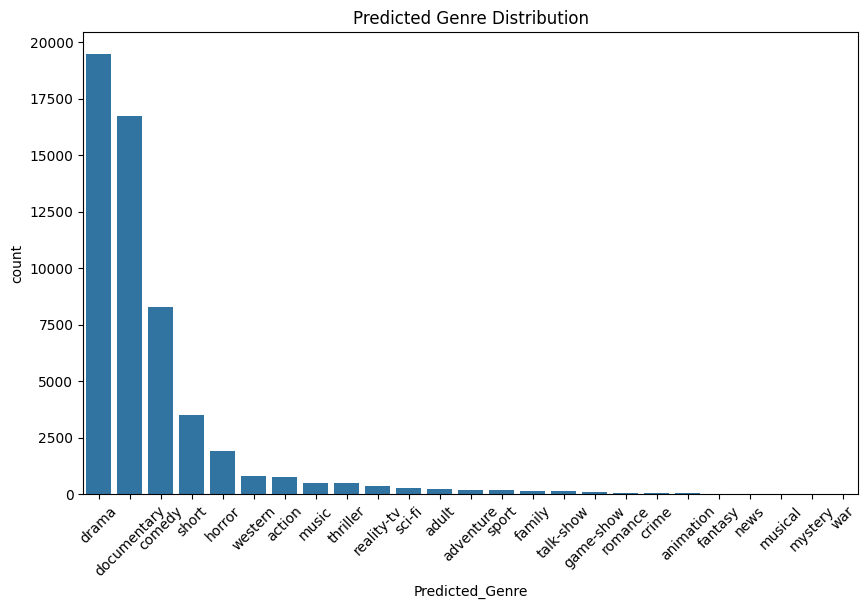

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Predicted_Genre', data=test_df, order=test_df['Predicted_Genre'].value_counts().index)
plt.title("Predicted Genre Distribution")
plt.xticks(rotation=45)
plt.show()


In [41]:
def predict_genre(desc):
    vec = vectorizer.transform([desc])
    pred = lr_model.predict(vec)
    return label_encoder.inverse_transform(pred)[0]

print(predict_genre("A young boy joins a wizarding school."))


drama


In [43]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


In [44]:
import gradio as gr

def predict_genre_gradio(desc):
    vec = vectorizer.transform([desc])
    pred = lr_model.predict(vec)
    return label_encoder.inverse_transform(pred)[0]

gr.Interface(fn=predict_genre_gradio, inputs="text", outputs="text").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://955e1620e8294039fd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
